## IDENTIFY MAJOR CAUSES OF ACCIDENT USING ML CLASSIFICATION ALGORITHM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("drive/My Drive/RTA Dataset.csv")

In [4]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
data.shape

(12316, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
null=round(100*(data.isnull().sum()/data.shape[0]),2)
null[null>0]

Educational_level           6.02
Vehicle_driver_relation     4.70
Driving_experience          6.73
Type_of_vehicle             7.71
Owner_of_vehicle            3.91
Service_year_of_vehicle    31.89
Defect_of_vehicle          35.95
Area_accident_occured       1.94
Lanes_or_Medians            3.13
Road_allignment             1.15
Types_of_Junction           7.20
Road_surface_type           1.40
Type_of_collision           1.26
Vehicle_movement            2.50
Work_of_casuality          25.97
Fitness_of_casuality       21.39
dtype: float64

#### Replacing the null values of the above categorigal column with proper value and drop the column if they are highly skewed towards one value

In [9]:
#Educational_level
100*(data.Educational_level.value_counts(normalize=True))

Junior high school    65.822894
Elementary school     18.686825
High school            9.589633
Above high school      3.127430
Writing & reading      1.520518
Unknown                0.863931
Illiterate             0.388769
Name: Educational_level, dtype: float64

#### Replace null values with most frequent value

In [10]:
data['Educational_level'] = data['Educational_level'].replace(np.nan,'Junior high school')

In [11]:
#Vehicle_driver_relation
100*(data.Vehicle_driver_relation.value_counts(normalize=True))

Employee    82.022663
Owner       16.810088
Other        1.047968
Unknown      0.119281
Name: Vehicle_driver_relation, dtype: float64

#### drop above column as it's highly skewed

In [12]:
#Driving_experience
100*(data.Driving_experience.value_counts(normalize=True))

5-10yr        29.276574
2-5yr         22.747454
Above 10yr    19.691826
1-2yr         15.286846
Below 1yr     11.682772
No Licence     1.027248
unknown        0.287281
Name: Driving_experience, dtype: float64

#### Replace null values with most frequent value

In [13]:
#Driving_experience
data['Driving_experience'] = data['Driving_experience'].replace(np.nan,'5-10yr')

In [14]:
#Type_of_vehicle
100*(data.Type_of_vehicle.value_counts(normalize=True))

Automobile              28.198135
Lorry (41?100Q)         19.232800
Other                   10.628189
Pick up upto 10Q         7.135316
Public (12 seats)        6.255499
Stationwagen             6.044343
Lorry (11?40Q)           4.759810
Public (13?45 seats)     4.680626
Public (> 45 seats)      3.554461
Long lorry               3.369699
Taxi                     2.331515
Motorcycle               1.557276
Special vehicle          0.739046
Ridden horse             0.668661
Turbo                    0.404716
Bajaj                    0.255147
Bicycle                  0.184762
Name: Type_of_vehicle, dtype: float64

#### Replace null values with most frequent value

In [15]:
data['Type_of_vehicle'] = data['Type_of_vehicle'].replace(np.nan,'Automobile')

In [16]:
#Owner_of_vehicle
100*(data.Owner_of_vehicle.value_counts(normalize=True))

Owner           88.380936
Governmental     8.796688
Organization     2.636471
Other            0.185905
Name: Owner_of_vehicle, dtype: float64

#### drop above column as it is highly skewed

In [17]:
#Service_year_of_vehicle
100*(data.Service_year_of_vehicle.value_counts(normalize=True))

Unknown       34.370529
2-5yrs        21.363853
Above 10yr    15.784454
5-10yrs       15.259895
1-2yr          9.859323
Below 1yr      3.361946
Name: Service_year_of_vehicle, dtype: float64

#### drop above column as 34% values are not available and ~32% of values are null

In [18]:
#Defect_of_vehicle drop as highly skewed and ~36% data are null
100*(data.Defect_of_vehicle.value_counts(normalize=True))

No defect    98.580302
7             0.963367
5             0.456332
Name: Defect_of_vehicle, dtype: float64

#### drop above column as it is highly skewed

In [19]:
#Area_accident_occured
100*(data.Area_accident_occured.value_counts(normalize=True))

Other                              31.622092
Office areas                       28.574977
Residential areas                  17.057216
 Church areas                       8.777014
 Industrial areas                   3.775772
School areas                        3.436284
  Recreational areas                2.707626
 Outside rural areas                1.805084
 Hospital areas                     1.001904
  Market areas                      0.521653
Rural village areas                 0.364329
Unknown                             0.182164
Rural village areasOffice areas     0.165604
Recreational areas                  0.008280
Name: Area_accident_occured, dtype: float64

In [20]:
data['Area_accident_occured'] = data['Area_accident_occured'].replace(np.nan,'Other')

In [21]:
#Lanes_or_Medians
100*(data.Lanes_or_Medians.value_counts(normalize=True))

Two-way (divided with broken lines road marking)    36.970916
Undivided Two way                                   31.816277
other                                               13.913335
Double carriageway (median)                          8.549158
One way                                              7.082390
Two-way (divided with solid lines road marking)      1.190177
Unknown                                              0.477747
Name: Lanes_or_Medians, dtype: float64

#### Replace null values with most frequent value

In [22]:
data['Lanes_or_Medians'] = data['Lanes_or_Medians'].replace(np.nan,'Two-way (divided with broken lines road marking)')

In [23]:
#Road_allignment
100*(data.Road_allignment.value_counts(normalize=True))

Tangent road with flat terrain                   85.912601
Tangent road with mild grade and flat terrain     4.115328
Steep grade downward with mountainous terrain     3.523903
Tangent road with mountainous terrain and         3.252834
Gentle horizontal curve                           1.338919
Escarpments                                       0.928208
Sharp reverse curve                               0.468211
Tangent road with rolling terrain                 0.303926
Steep grade upward with mountainous terrain       0.156070
Name: Road_allignment, dtype: float64

In [24]:
#Type_of_Junction
100*(data.Types_of_Junction.value_counts(normalize=True))

Y Shape        39.749759
No junction    33.572491
Crossing       19.048036
Other           3.893604
Unknown         1.671187
O Shape         1.434946
T Shape         0.524980
X Shape         0.104996
Name: Types_of_Junction, dtype: float64

In [25]:
data['Types_of_Junction'] = data['Types_of_Junction'].replace(np.nan,'Y Shape')

In [26]:
#Road_surface_type
100*(data.Road_surface_type.value_counts(normalize=True))

Asphalt roads                       93.017128
Earth roads                          2.947958
Gravel roads                         1.992754
Other                                1.375165
Asphalt roads with some distress     0.666996
Name: Road_surface_type, dtype: float64

In [27]:
#Type_of_collision
100*(data.Type_of_collision.value_counts(normalize=True))

Vehicle with vehicle collision             72.148672
Collision with roadside objects            14.686292
Collision with pedestrians                  7.367815
Rollover                                    3.264534
Collision with animals                      1.406134
Collision with roadside-parked vehicles     0.444042
Fall from vehicles                          0.279582
Other                                       0.213798
Unknown                                     0.115122
With Train                                  0.074007
Name: Type_of_collision, dtype: float64

In [28]:
data['Type_of_collision'] = data['Type_of_collision'].replace(np.nan,'Vehicle with vehicle collision')

In [29]:
#Vehicle_movement
100*(data.Vehicle_movement.value_counts(normalize=True))

Going straight         67.938041
Moving Backward         8.202865
Other                   7.803131
Reversing               4.688541
Turnover                4.072285
Getting off             2.823118
Entering a junction     1.607262
Overtaking              0.799467
Unknown                 0.732845
Stopping                0.507995
U-Turn                  0.416389
Waiting to go           0.324783
Parked                  0.083278
Name: Vehicle_movement, dtype: float64

In [30]:
data['Vehicle_movement'] = data['Vehicle_movement'].replace(np.nan,'Going straight')

In [31]:
#Work_of_casuality
100*(data.Work_of_casuality.value_counts(normalize=True))

Driver           64.740075
Self-employed    22.417197
Employee          6.064927
Other             5.077868
Student           1.129634
Unemployed        0.361921
Unknown           0.208379
Name: Work_of_casuality, dtype: float64

In [32]:
data['Work_of_casuality'] = data['Work_of_casuality'].replace(np.nan,'Driver')

In [33]:
#Fitness_of_casuality
100*(data.Fitness_of_casuality.value_counts(normalize=True))

Normal          99.245946
NormalNormal     0.196261
Deaf             0.185931
Other            0.185931
Blind            0.185931
Name: Fitness_of_casuality, dtype: float64

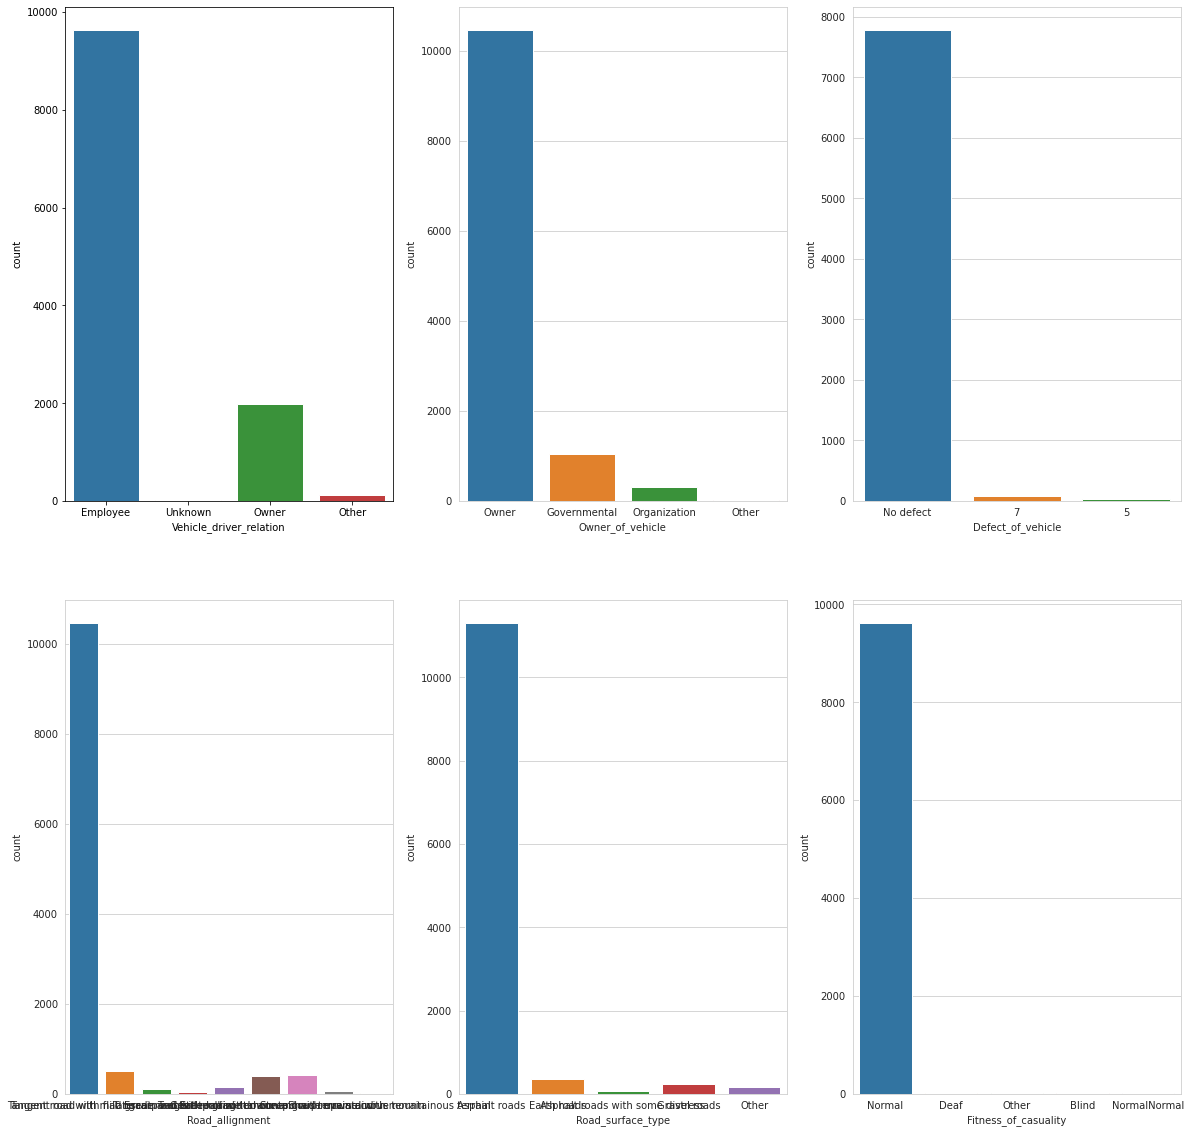

In [34]:
columns=['Vehicle_driver_relation','Owner_of_vehicle','Defect_of_vehicle', 'Road_allignment','Road_surface_type','Fitness_of_casuality']


#Countplot on above Columns
plt.figure(figsize=(20,20))
for i in range(0,len(columns)):
    plt.subplot(2,3,i+1)
    sns.set_style("whitegrid")
    sns.countplot(x = columns[i], data=data)
    
plt.show()

### Dropping all the columns having highly skewed values otherwise the model will give biased result

In [35]:
#drop skewed columns
cols = ['Fitness_of_casuality','Road_surface_type','Service_year_of_vehicle','Road_allignment','Owner_of_vehicle','Vehicle_driver_relation','Defect_of_vehicle']
data.drop(cols,axis=1,inplace=True)

In [36]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Driver,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Driver,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Industrial areas,other,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Driver,Not a Pedestrian,Overtaking,Slight Injury


In [37]:
100*(data.Casualty_severity.value_counts(normalize=True))

3     57.453719
na    36.075024
2      6.260149
1      0.211108
Name: Casualty_severity, dtype: float64

In [38]:
100*(data.Age_band_of_casualty.value_counts(normalize=True))

na          36.075024
18-30       25.535888
31-50       19.933420
Under 18     8.403703
Over 51      8.070802
5            1.981163
Name: Age_band_of_casualty, dtype: float64

In [39]:
100*(data.Sex_of_casualty.value_counts(normalize=True))

Male      42.651835
na        36.075024
Female    21.273141
Name: Sex_of_casualty, dtype: float64

In [40]:
100*(data.Casualty_class.value_counts(normalize=True))

Driver or rider    40.142904
na                 36.075024
Pedestrian         13.389087
Passenger          10.392985
Name: Casualty_class, dtype: float64

In [41]:
data.drop(['Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity'],axis=1,inplace=True)

In [42]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Work_of_casuality              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [43]:
data.Cause_of_accident.value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

## Exploratory Data Analysis

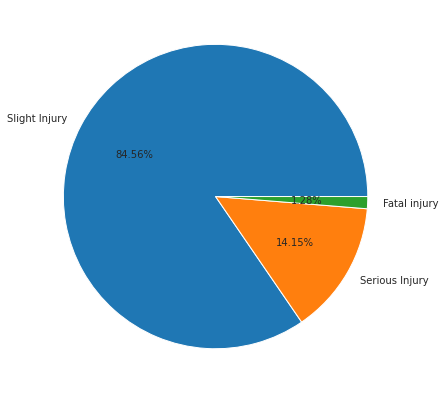

In [44]:
#Target variable
plt.figure(figsize=(10,7))
plt.pie(x=data['Accident_severity'].value_counts().values,
        labels=data['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

#### Target variable is imbalanced..need to balance it

In [45]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Driver,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Industrial areas,other,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver,Not a Pedestrian,Overtaking,Slight Injury


In [46]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


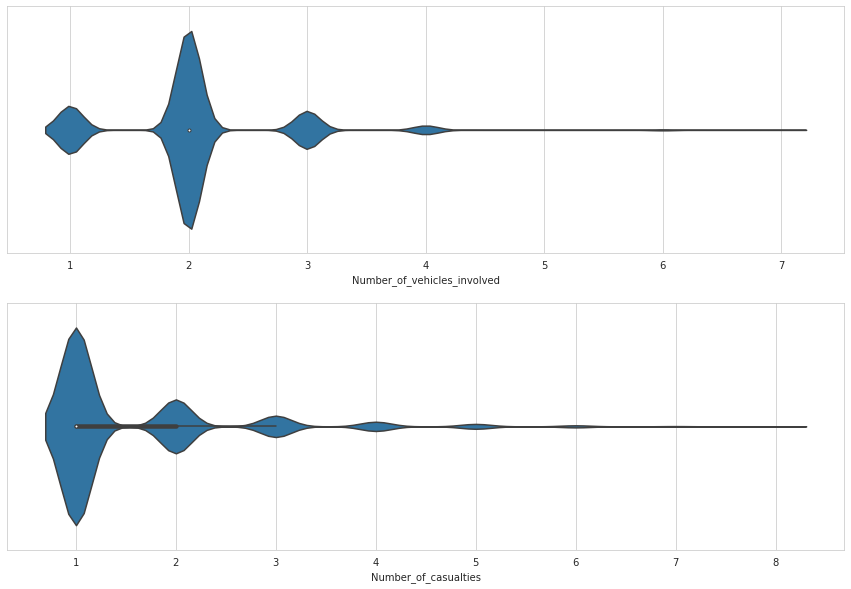

In [47]:
#Violin plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.violinplot( x = 'Number_of_vehicles_involved', data = data)
plt.subplot(2,1,2)
sns.violinplot( x = 'Number_of_casualties', data = data)
plt.show()

#### Most of the accidents:

involved 2 vehicles and 1-2 casualties

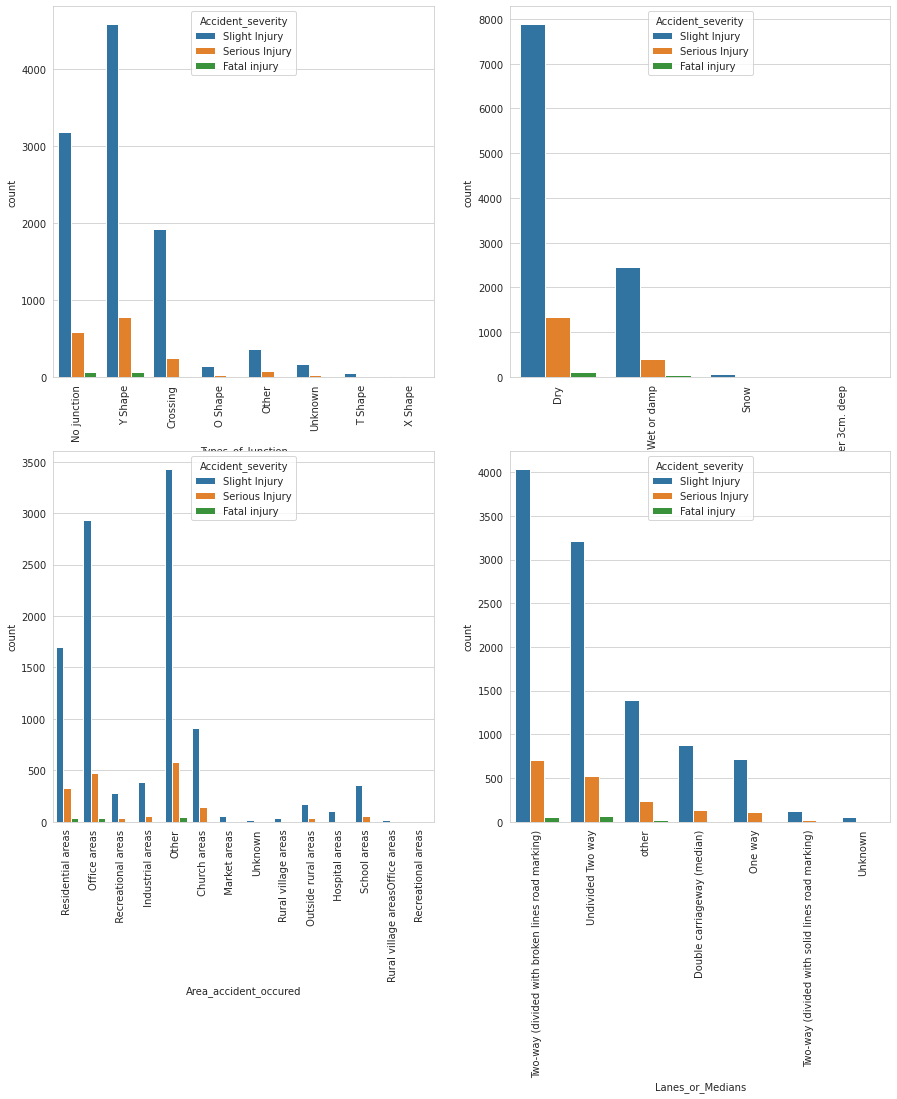

In [48]:
road = data[['Types_of_Junction','Road_surface_conditions','Area_accident_occured','Lanes_or_Medians']]
plt.figure(figsize=(15,15))
for i, col in enumerate(road):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=data, x=col,hue='Accident_severity',ax=ax)
    plt.xticks(rotation=90)
plt.show()

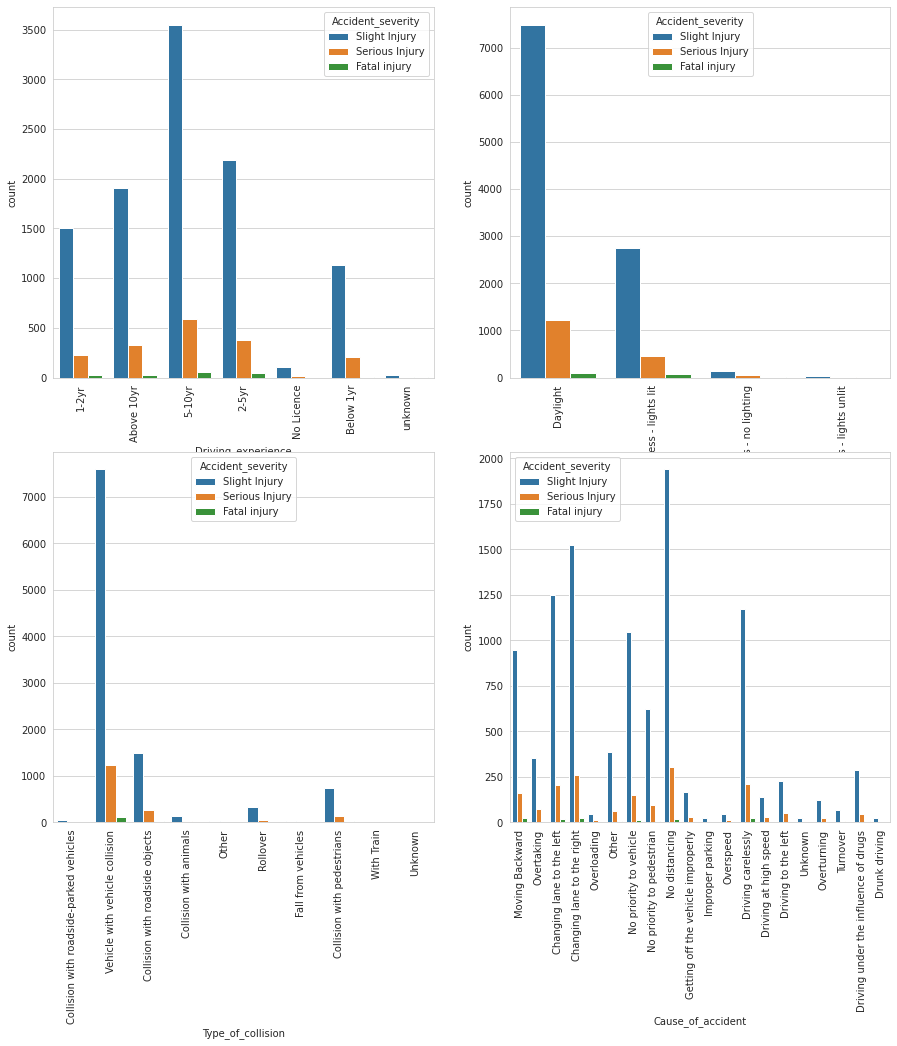

In [49]:
#other causes
other = data[['Driving_experience','Light_conditions','Type_of_collision','Cause_of_accident']]
plt.figure(figsize=(15,15))
for i, col in enumerate(other):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=data, x=col,hue='Accident_severity',ax=ax)
    plt.xticks(rotation=90)
plt.show()

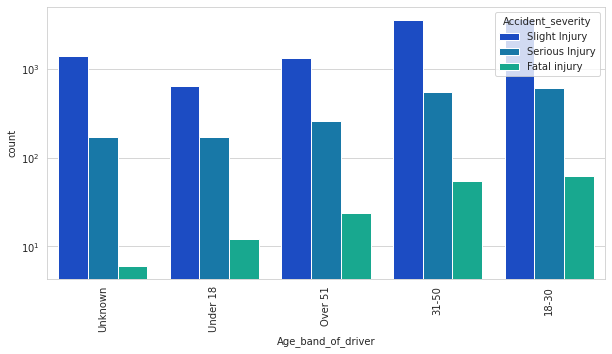

In [50]:
#Lead Origin Activity vs Converted
plt.figure(figsize = (10,5))
a=data.sort_values('Age_band_of_driver',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = 'Age_band_of_driver', hue = "Accident_severity", data = a, palette='winter')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

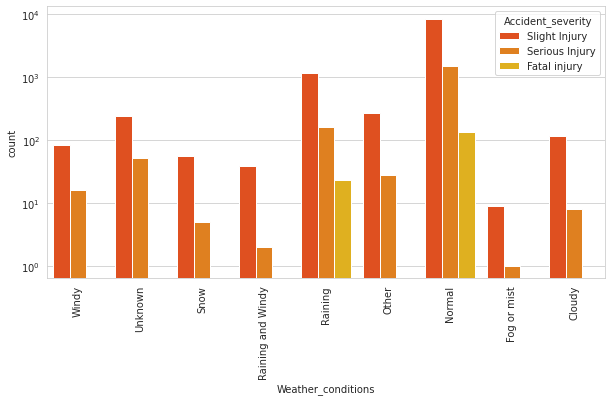

In [51]:
#Lead Origin Activity vs Converted
plt.figure(figsize = (10,5))
a=data.sort_values('Weather_conditions',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = 'Weather_conditions', hue = "Accident_severity", data = a, palette='autumn')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

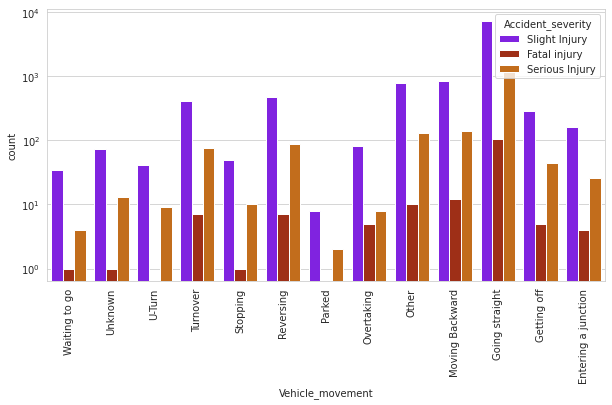

In [52]:
#Lead Origin Activity vs Converted
plt.figure(figsize = (10,5))
a=data.sort_values('Vehicle_movement',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = 'Vehicle_movement', hue = "Accident_severity", data = a, palette='gnuplot')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Accident_severity'] = labelencoder.fit_transform(data['Accident_severity'])
data['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

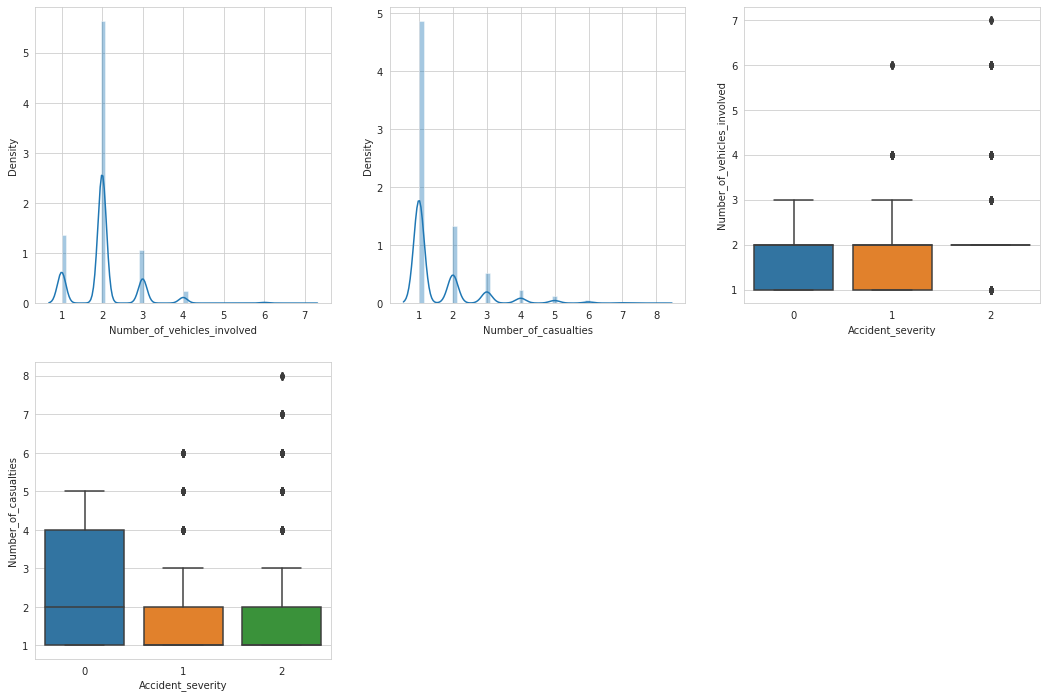

In [54]:
#Identification of outliers in Numerical Cols
numerical_cols = ['Number_of_vehicles_involved','Number_of_casualties']
plt.figure(figsize=(18,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.distplot(data[col])
    plt.subplot(2,3,2+i)
    sns.boxplot(y=data[col], x = data['Accident_severity'])
    i+=1

plt.show()

In [55]:
# Finding quantile3 and capping the upper outliers

Q3 = data['Number_of_vehicles_involved'].quantile(0.95)
data['Number_of_vehicles_involved'][data['Number_of_vehicles_involved']>=Q3]=Q3

Q3 = data['Number_of_casualties'].quantile(0.95)
data['Number_of_casualties'][data['Number_of_casualties']>=Q3]=Q3

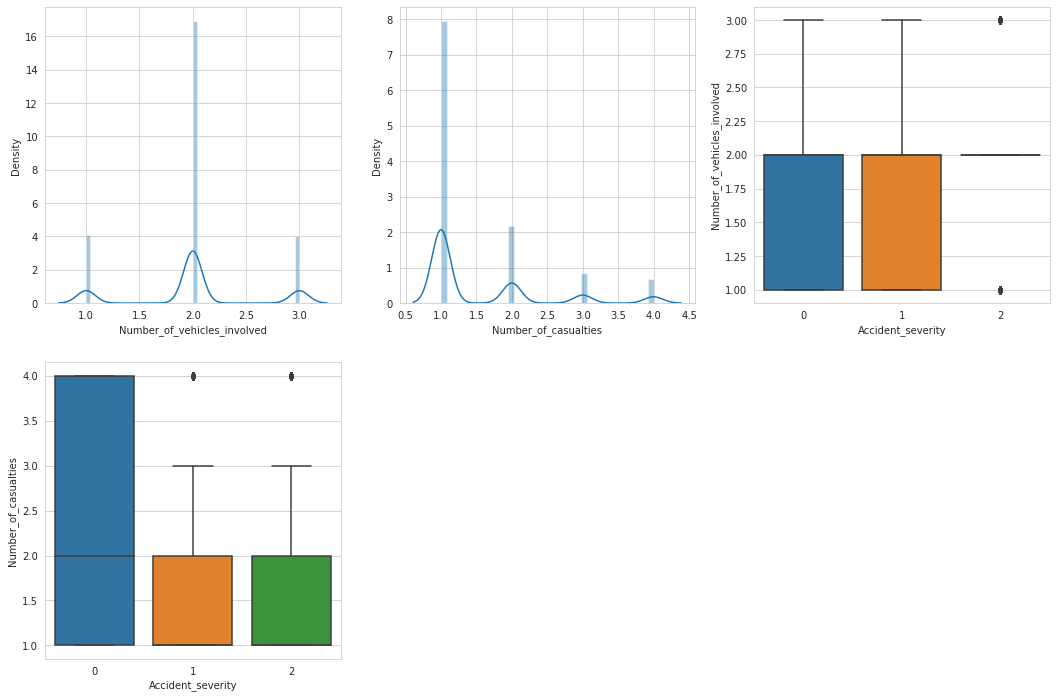

In [56]:
#Identification of outliers in Numerical Cols
numerical_cols = ['Number_of_vehicles_involved','Number_of_casualties']
plt.figure(figsize=(18,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.distplot(data[col])
    plt.subplot(2,3,2+i)
    sns.boxplot(y=data[col], x = data['Accident_severity'])
    i+=1

plt.show()

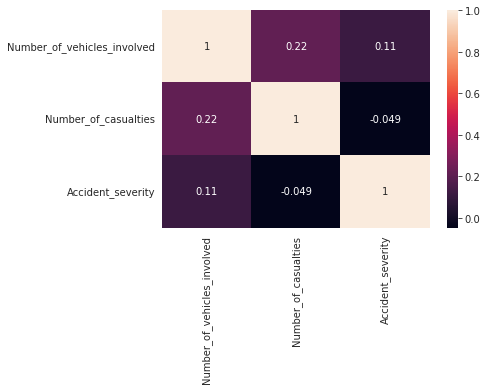

In [57]:
#Heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

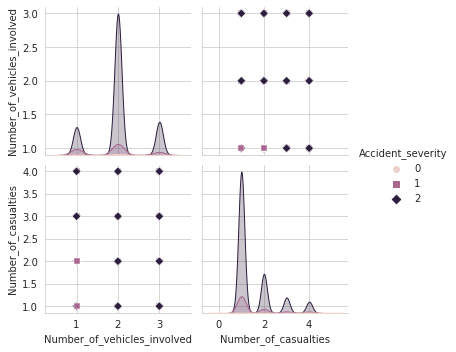

In [58]:
#Pairplot
#num = data[['Number_of_vehicles_involved','Number_of_casualties','Accident_severity']]
sns.pairplot(data,diag_kind='kde',hue='Accident_severity',markers=["o", "s", "D"])
plt.show()

In [59]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [60]:
#dummy variable creation
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),...,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Pedestrian_movement_Not a Pedestrian,Pedestrian_movement_Unknown or other,"Pedestrian_movement_Walking along in carriageway, back to traffic","Pedestrian_movement_Walking along in carriageway, facing traffic",Cause_of_accident_Changing lane to the right,Cause_of_accident_Driving at high speed,Cause_of_accident_Driving carelessly,Cause_of_accident_Driving to the left,Cause_of_accident_Driving under the influence of drugs,Cause_of_accident_Drunk driving,Cause_of_accident_Getting off the vehicle improperly,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Driver,Not a Pedestrian,Moving Backward,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver,Not a Pedestrian,Overtaking,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,17:02:00,Monday,18-30,Male,Junior high school

In [61]:
data = data.drop(['Time','Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident'], axis=1)
data.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,...,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Pedestrian_movement_Not a Pedestrian,Pedestrian_movement_Unknown or other,"Pedestrian_movement_Walking along in carriageway, back to traffic","Pedestrian_movement_Walking along in carriageway, facing traffic",Cause_of_accident_Changing lane to the right,Cause_of_accident_Driving at high speed,Cause_of_accident_Driving carelessly,Cause_of_accident_Driving to the left,Cause_of_accident_Driving under the influence of drugs,Cause_of_accident_Drunk driving,Cause_of_accident_Getting off the vehicle improperly,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,2,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

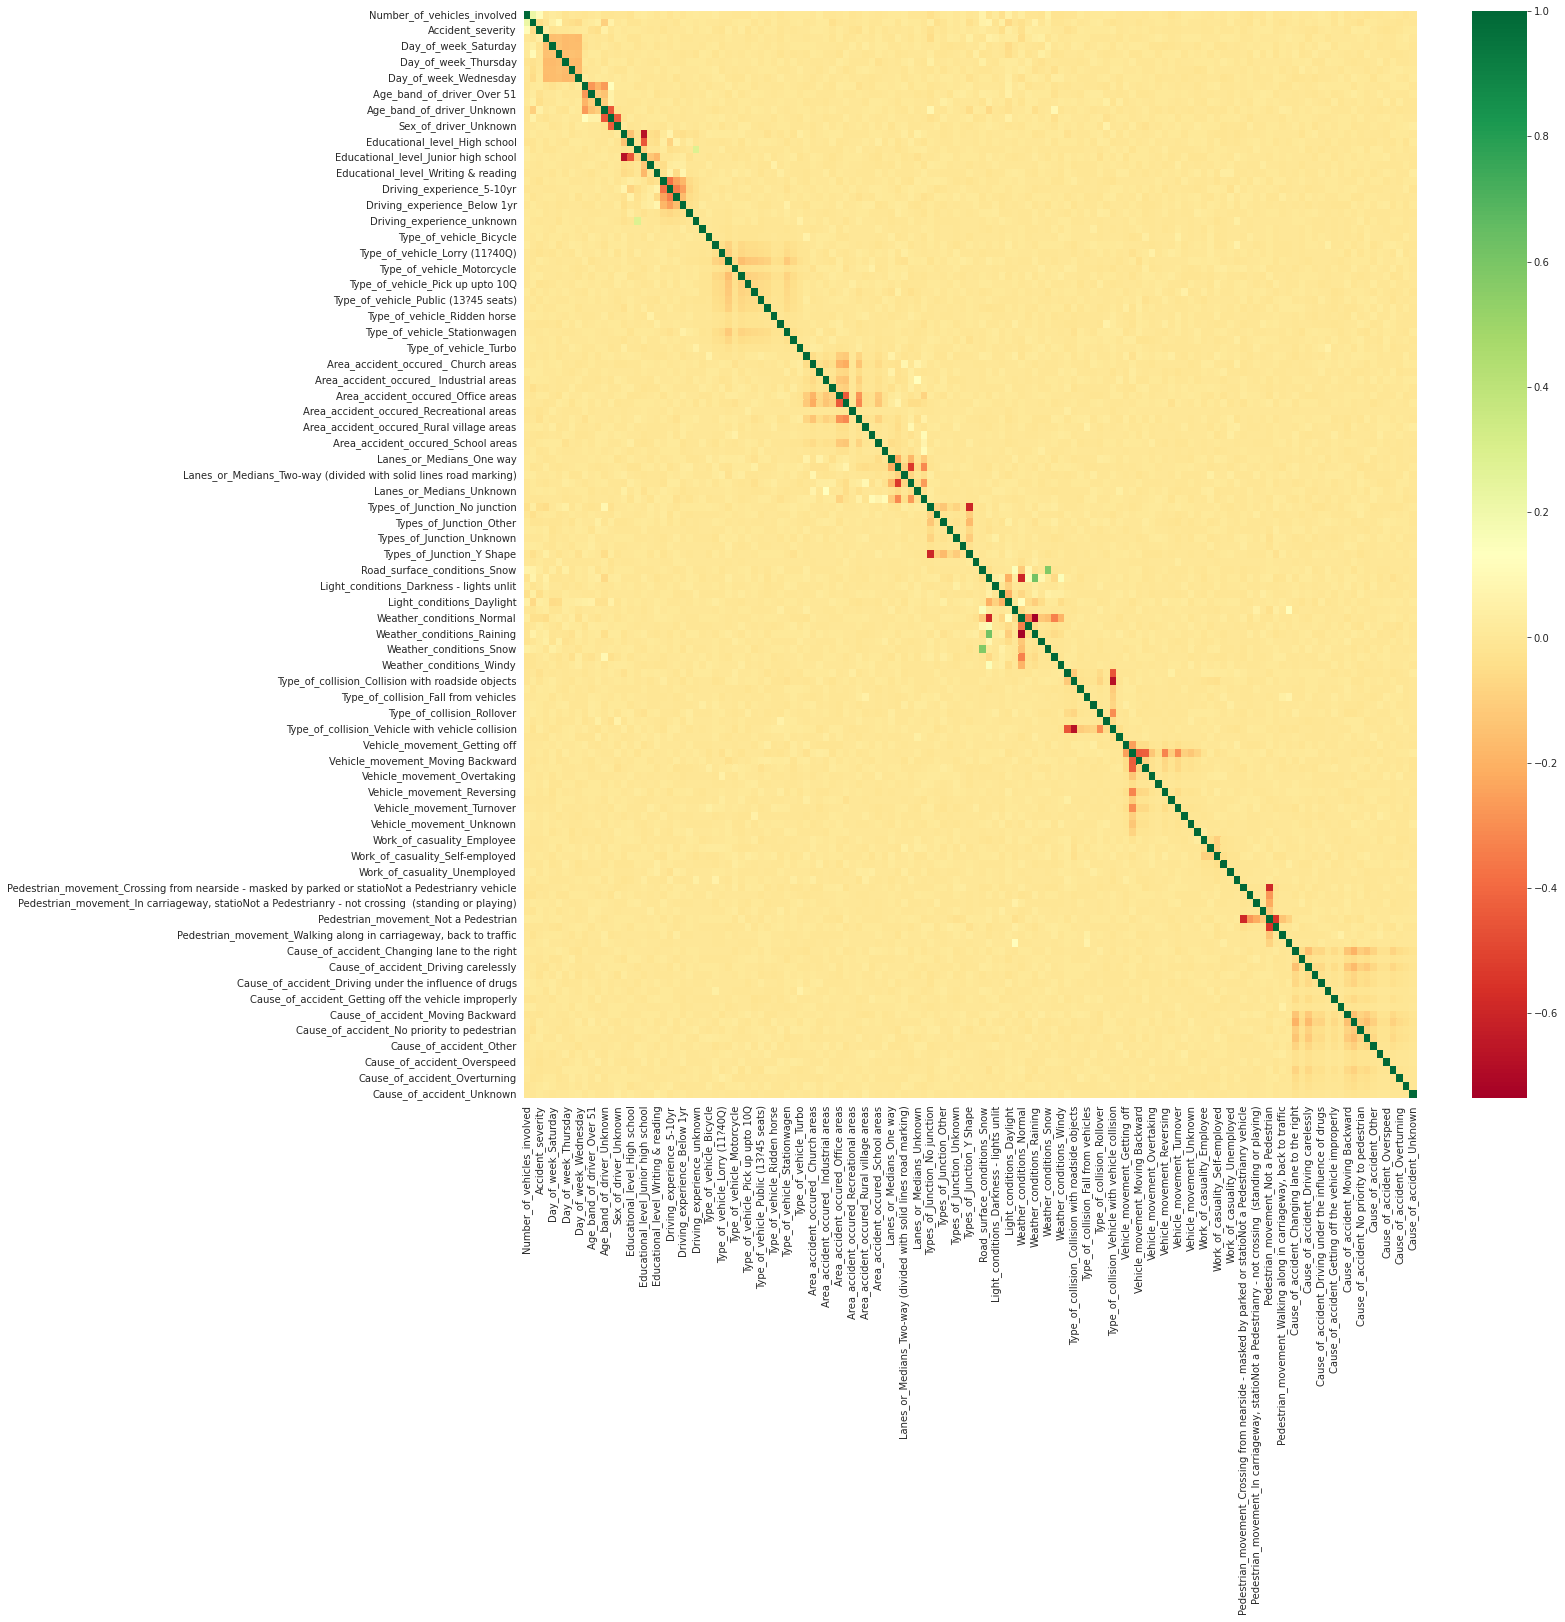

In [62]:
# Visualizing the data using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(data.corr(), cmap="RdYlGn")
plt.show()

In [63]:
#Correlation
corr_data = data.corr()
corr_data = corr_data.where(np.triu(np.ones(corr_data.shape),k=1).astype(np.bool))
corr_df = corr_data.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
10757,Weather_conditions_Raining,Road_surface_conditions_Wet or damp,0.614954
11030,Weather_conditions_Snow,Road_surface_conditions_Snow,0.579302
3579,Driving_experience_unknown,Educational_level_Illiterate,0.283218
137,Number_of_casualties,Number_of_vehicles_involved,0.216599
10620,Weather_conditions_Other,Road_surface_conditions_Wet or damp,0.158869


In [64]:
#train_test_split
# Putting feature variable to X
X = data.drop('Accident_severity',axis=1)

# Putting response variable to y
y = data['Accident_severity']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((8621, 136), (3695, 136))

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

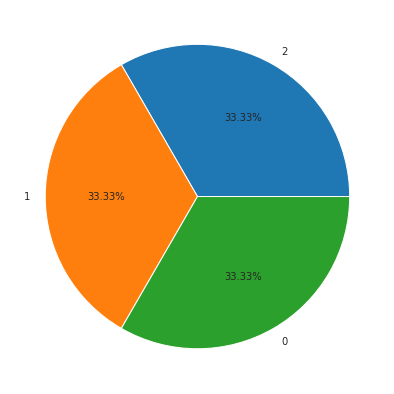

In [68]:
plt.figure(figsize=(10,7))
plt.pie(x=y_smote.value_counts().values,
        labels=y_smote.value_counts().index,
        autopct='%2.2f%%')
plt.show()

## Model Building with ExtraTree Classifier

In [117]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
extree = ExtraTreesClassifier()
extree.fit(X_smote, y_smote)
y_pred = extree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8075778078484438

In [114]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [115]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
model_performance(extree,y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Hyper Parameter Tuning

In [121]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

extree_model = gsearch.fit(X=X_smote, y=y_smote)
(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.7807411946525775)

In [125]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 100)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_smote, y=y_smote)

(gsearch2.best_params_, gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 3,
  'n_estimators': 700},
 0.7943674244003608)

In [126]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_smote, y_smote)
y_pred_tuned = extree_tuned.predict(X_test)

In [127]:
## Explainable AI

In [131]:
import shap
shap.initjs()

In [132]:
X_sample = X_smote.sample(100)
X_sample

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Recreational areas,...,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Pedestrian_movement_Not a Pedestrian,Pedestrian_movement_Unknown or other,"Pedestrian_movement_Walking along in carriageway, back to traffic","Pedestrian_movement_Walking along in carriageway, facing traffic",Cause_of_accident_Changing lane to the right,Cause_of_accident_Driving at high speed,Cause_of_accident_Driving carelessly,Cause_of_accident_Driving to the left,Cause_of_accident_Driving under the influence of drugs,Cause_of_accident_Drunk driving,Cause_of_accident_Getting off the vehicle improperly,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
14114,2,4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8138,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
663,2,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [133]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

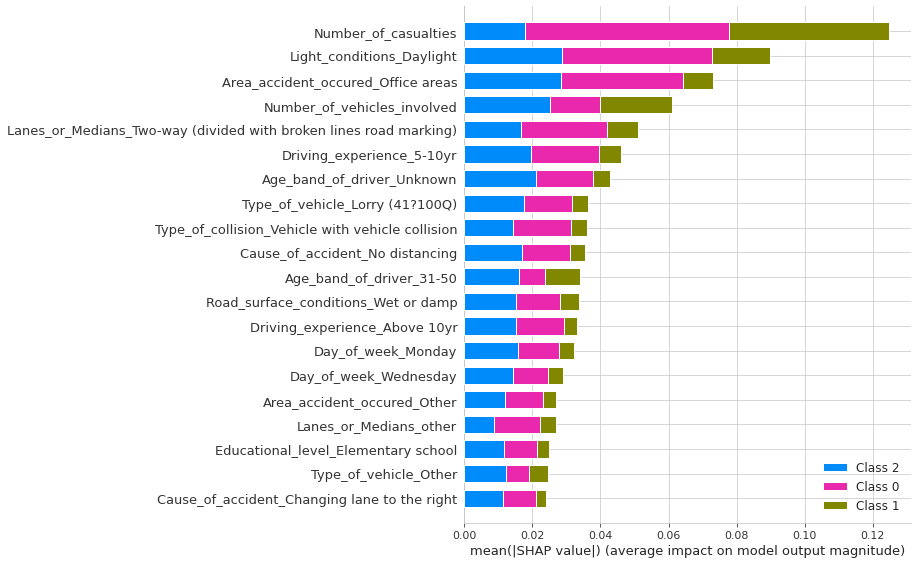

In [134]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

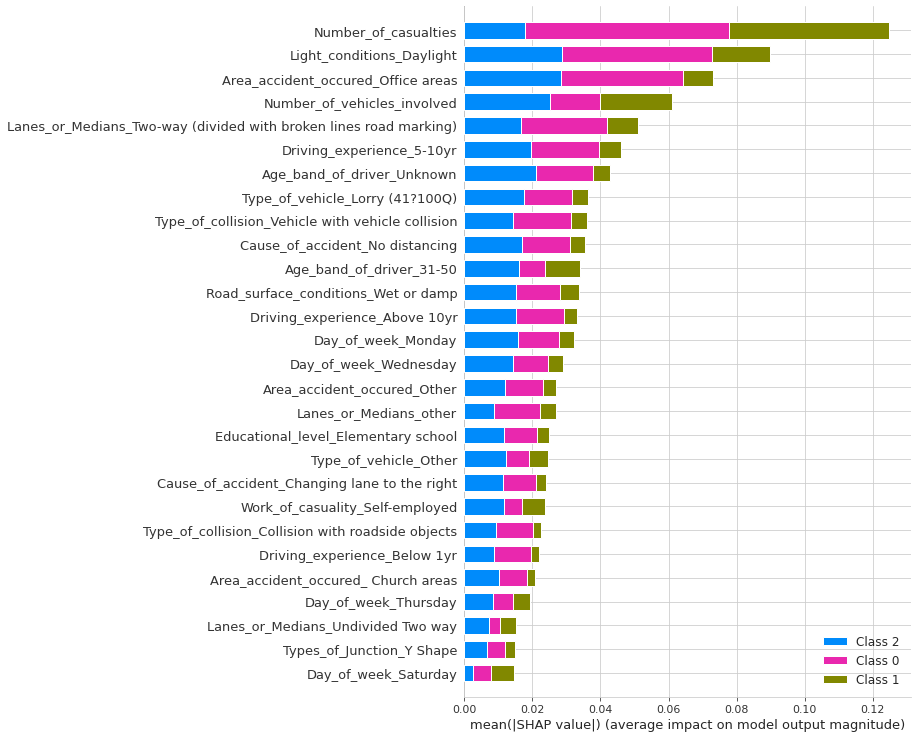

In [135]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [136]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [137]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

2


In [138]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


2


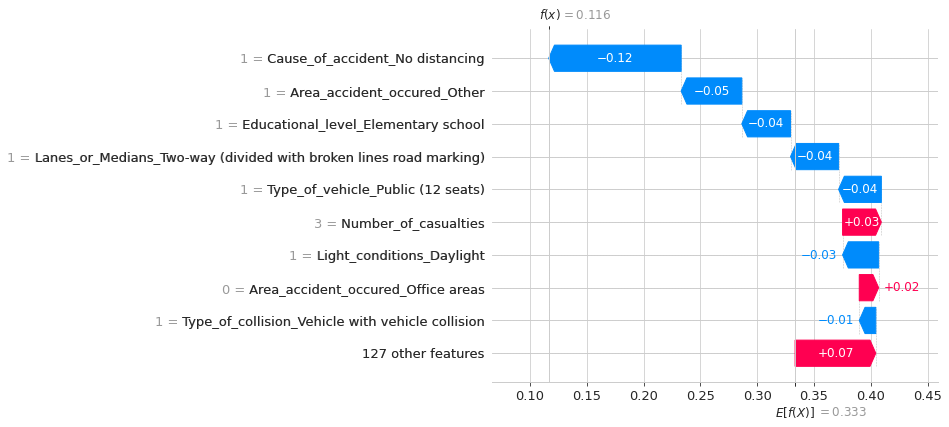

In [139]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

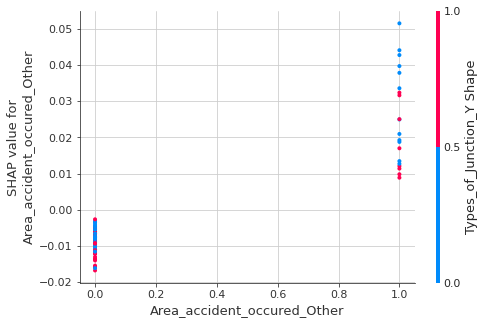

In [141]:
shap.dependence_plot('Area_accident_occured_Other', shap_values[2], X_sample)

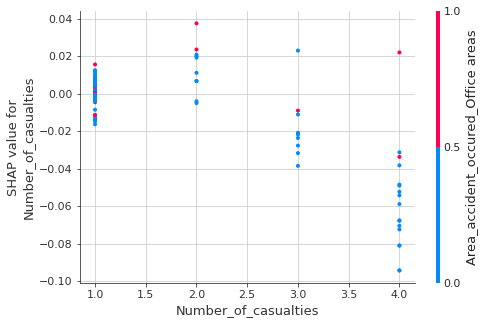

In [144]:
shap.dependence_plot('Number_of_casualties', shap_values[2], X_sample)

2


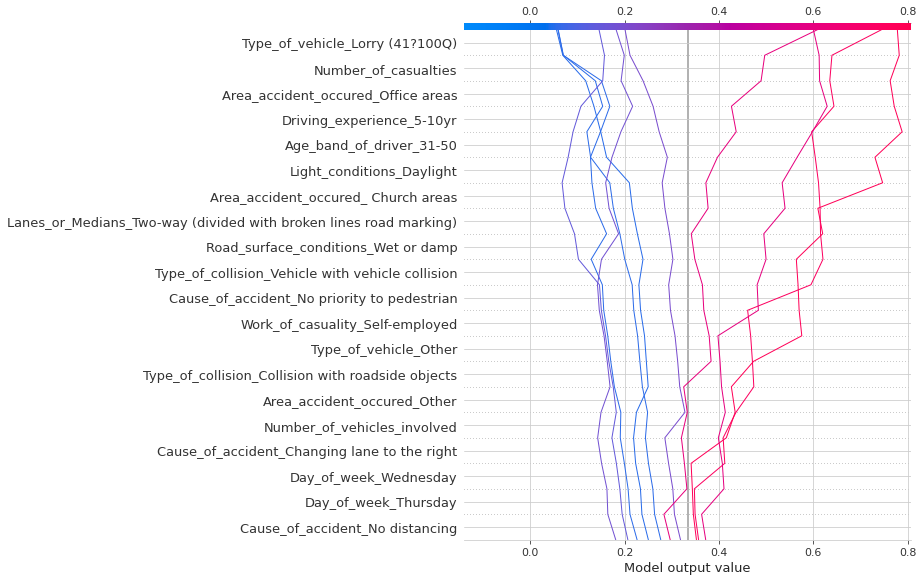

In [145]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())